In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import math
from datetime import datetime

In [2]:
os.chdir('D:\\Moji fajlovi\\Master\\prog\\Project 5 - Agriculture Data Analysis')

In [3]:
data = pd.read_csv('database_biosense.csv',header=0, delimiter=';',skiprows=1)
data.head()

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Irrigation,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date
0,G-1/1,"63,38",2018,Maize,0,NS 205,Maize,184,0,"237,719575",...,9000,"11853,74",9450,"5037,277795","15202,25308","7,811454718","14,4","112484,9479",15.6.2018,15.10.2018
1,G-1/2,"23,01",2018,Barley,0,Salamandre,Maize,46,0,"238,6363636",...,0,"11762,74","8594,30605","7079,225979",1435,"7,146352313","15,8","112912,3665",28.9.2017,5.6.2018
2,G-2/1,"94,88",2018,Soybean,0,Gorstak,Maize,"100,33",0,"214,6331148",...,9000,"11549,5","10191,21689","7146,257137","11843,41404","3,388877141","37,35","126574,5612",19.4.2018,13.9.2018
3,G-2/2,"20,59",2018,Soybean,0,Wendy,Maize,"93,15",0,"140,8450704",...,0,"11571,08","5428,848956","4776,056338","12594,37882","3,71296746","37,35","138679,3346",17.4.2018,14.9.2018
4,G-3/1,"63,62",2018,Maize,0,DKC 5830,Wheat,60,"1,886199308","474,6934926",...,9000,"12801,04","19899,77051","19745,51399","4947,696479","14,60232631","14,4","210273,4989",17.4.2018,14.9.2018


In [4]:
data.isnull().any()

Parcel                    False
Area                      False
Year                      False
Crop                      False
Seed production           False
Variety                    True
Previous crop              True
Seed units                 True
Manure                    False
Fertiliser amount         False
Pesticide amount          False
Tillage                   False
Sowing                    False
Fertiliser application    False
Pesticide application     False
Irrigation                False
Harvest                   False
Seed                      False
Fertiliser                False
Pesticide                 False
Yield                     False
Price                     False
Revenue                   False
Planting date              True
Harvest date               True
dtype: bool

In [5]:
data.fillna({'Variety':'None','Previous crop': 'None','Seed units': '0'}, inplace=True)

In [6]:
convert_todot = lambda x: float(x.replace(',','.'))

In [7]:
data['Area'] = data['Area'].apply(convert_todot)

In [8]:
l = list(data)[7:23]
for i in l:
    try:
        data[i] = data[i].apply(convert_todot)
    except ValueError:
        continue

In [9]:
drop = data['Planting date'].dropna()
i1 = list(drop.index.values)
newd = data.loc[i1]

In [10]:
drop2 = newd['Harvest date'].dropna()
i2 = list(drop2.index.values)
newd = newd.loc[i2]

In [11]:
convert_date = lambda x: datetime.strptime(str(x), '%d.%m.%Y')

In [12]:
newd['Planting date'] = newd['Planting date'].apply(convert_date)
newd['Harvest date'] = newd['Harvest date'].apply(convert_date)

In [13]:
crops = list(newd['Crop'].unique())
crops

['Maize',
 'Barley',
 'Soybean',
 'Wheat',
 'Sunflower',
 'Oilseed rape',
 '2nd soybean']

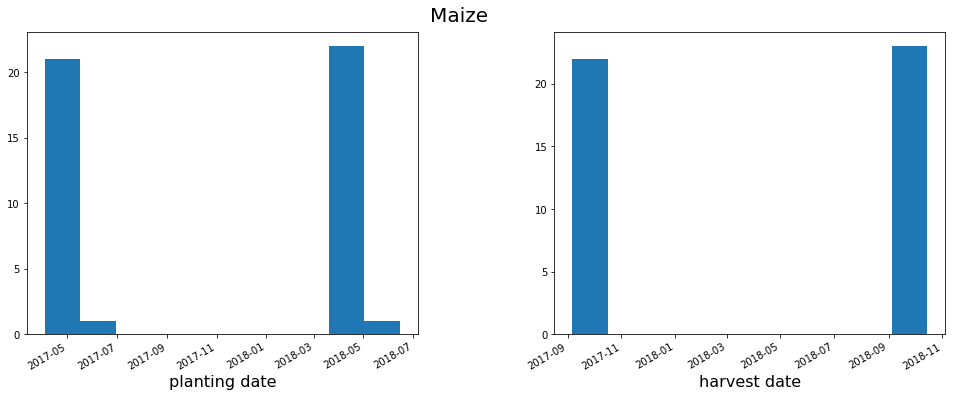

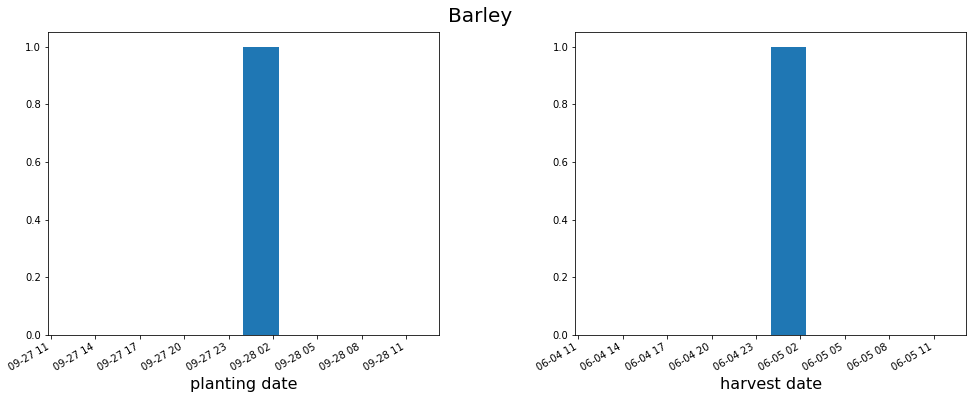

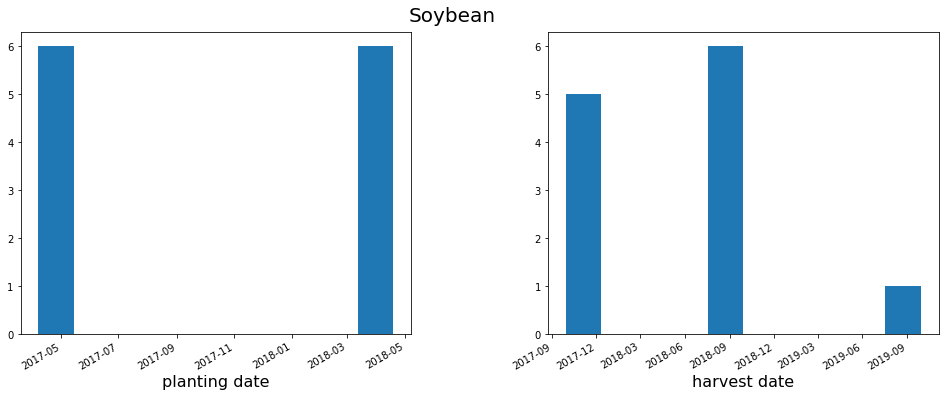

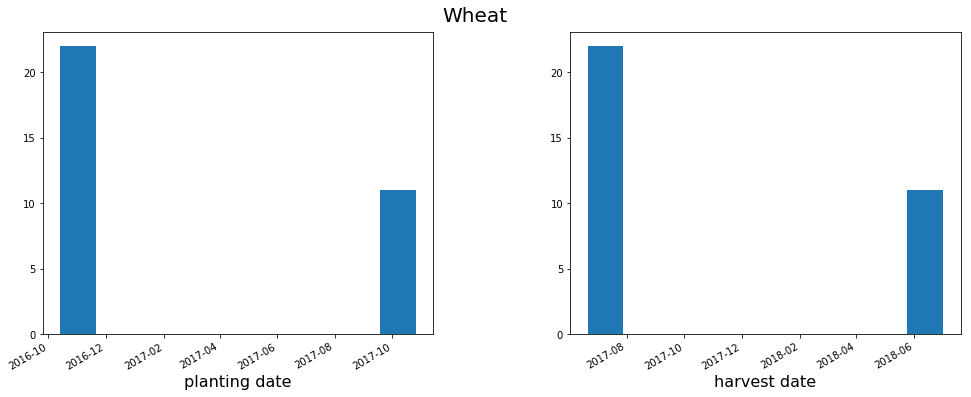

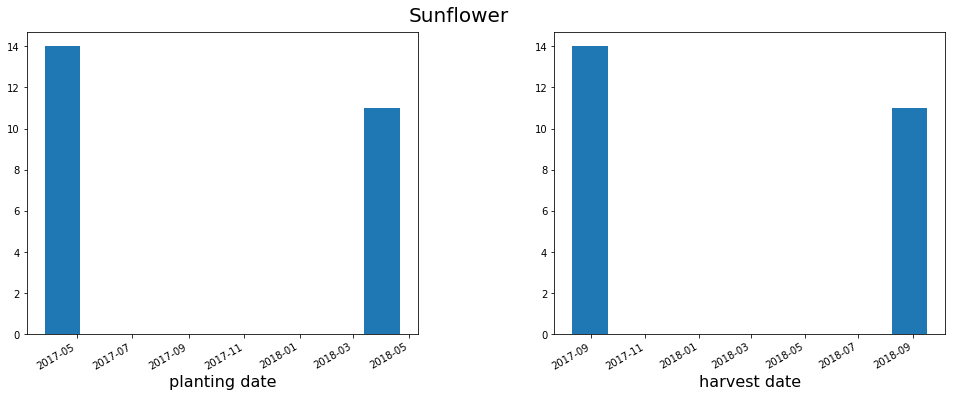

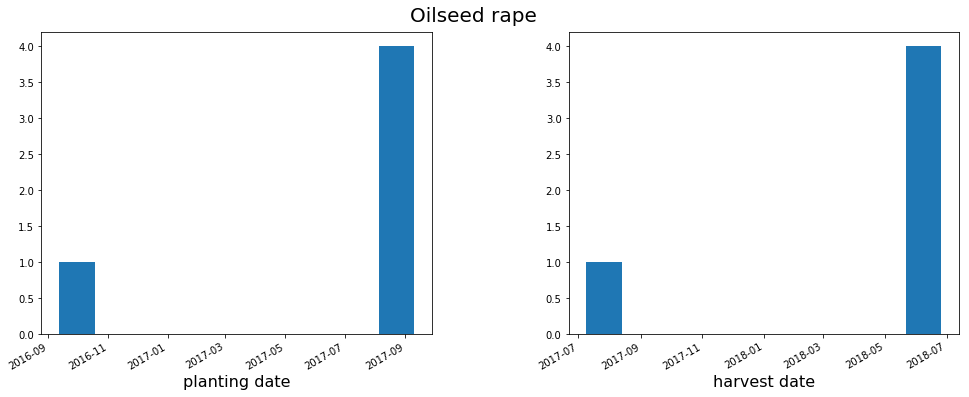

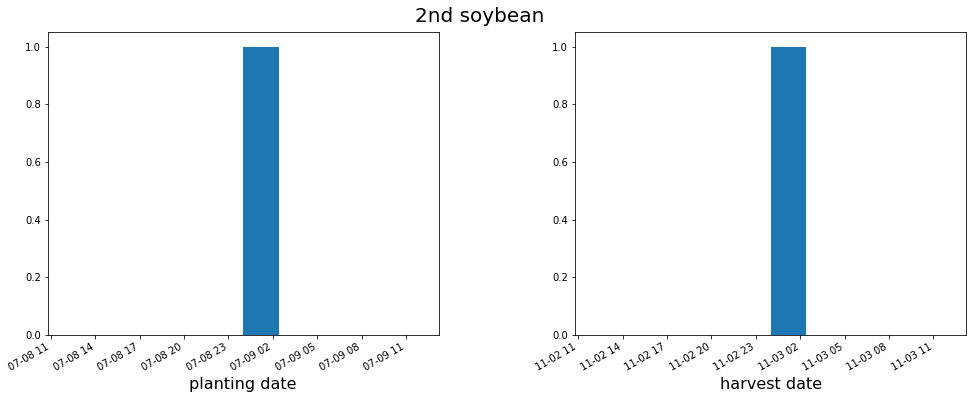

In [14]:
n = len(crops)
for i in range(n):
    fig = plt.figure(figsize=(15,5))
    
    df = newd[newd['Crop']==crops[i]]
    
    ax1 = fig.add_subplot(121)
    plt.hist(df['Planting date'].values)
    ax1.set_xlabel('planting date',fontsize=16)
    
    ax2 = fig.add_subplot(122)
    plt.hist(df['Harvest date'].values)
    ax2.set_xlabel('harvest date',fontsize=16)
    
    fig.autofmt_xdate()
    fig.suptitle(crops[i], fontsize = 20, y=0.99)
    fig.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.35)
plt.show()

In [ ]:
for i in range(n): 
    fig2 = plt.figure(figsize=(10,5))
    df2 = newd[newd['Crop']==crops[i]]
    
    df16 = df2[df2['Year'] == 2016]
    std16 = np.std(df16['Yield'])
    df17 = df2[df2['Year'] == 2017]
    std17 = np.std(df17['Yield'])
    df18 = df2[df2['Year'] == 2018]
    std18 = np.std(df18['Yield'])
    
    ax = fig2.add_subplot(1,1,1)
    sns.boxplot(x='Year',y='Yield',data=df2)
    
    text = '\n'.join(('Variability of yield:',"\u2022 std 2016:"+str(round(std16,2)), '\u2022 std 2017: '+str(round(std17,2)),
                      '\u2022 std 2018: '+str(round(std18,2))))
    props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)
    plt.figtext(0.95, 0.4, text,family='sans-serif', color='k', fontsize=15, bbox=props)
    #plt.subplots_adjust()
    fig2.suptitle(crops[i],fontsize=20,fontweight=5)
plt.show()

In [ ]:

for i in range(n): 
    
    df3 = newd[newd['Crop']==crops[i]]
    text = '\n'.join((crops[i],'One have '+str(len(df3['Variety'].unique()))+' planted unique varieties.','Frequencies of their usage:'))
    
    k = df3['Variety'].value_counts()
    varieties = k.index.values
    counts = k.values
    for j in range(k.shape[0]):
        text ='\n'.join((text,'\u2022'+varieties[j]+':'+str(counts[j])))
        
print(text)

In [ ]:
pivot = newd[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0)

In [ ]:
chi2 = stats.chi2_contingency(pivot)

In [ ]:
if chi2[1] <= 0.01:
    print('Previous crop and Crop attribute are dependent at level confidence 0.01.')
elif chi2[1] <= 0.05:
    print('Previous crop and Crop attribute are dependent at level confidence 0.05.')
else:
    print('Previous crop and Crop attribute are independent.')

In [15]:
newd['Duration of season (days)'] = newd['Harvest date']-newd['Planting date']

In [16]:
newd['Duration of season (days)'] = newd['Duration of season (days)'].apply(lambda x: float(x.days))
newd

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date,Duration of season (days)
0,G-1/1,63.38,2018,Maize,0,NS 205,Maize,184.000000,0.000000,237.719575,...,11853.74,9450.000000,5037.277795,15202.253080,7.811455,14.40,112484.94790,2018-06-15,2018-10-15,122.0
1,G-1/2,23.01,2018,Barley,0,Salamandre,Maize,46.000000,0.000000,238.636364,...,11762.74,8594.306050,7079.225979,1435.000000,7.146352,15.80,112912.36650,2017-09-28,2018-06-05,250.0
2,G-2/1,94.88,2018,Soybean,0,Gorstak,Maize,100.330000,0.000000,214.633115,...,11549.50,10191.216890,7146.257137,11843.414040,3.388877,37.35,126574.56120,2018-04-19,2018-09-13,147.0
3,G-2/2,20.59,2018,Soybean,0,Wendy,Maize,93.150000,0.000000,140.845070,...,11571.08,5428.848956,4776.056338,12594.378820,3.712967,37.35,138679.33460,2018-04-17,2018-09-14,150.0
4,G-3/1,63.62,2018,Maize,0,DKC 5830,Wheat,60.000000,1.886199,474.693493,...,12801.04,19899.770510,19745.513990,4947.696479,14.602326,14.40,210273.49890,2018-04-17,2018-09-14,150.0
5,G-3/2,17.80,2018,Maize,0,DKC 5830,Wheat,14.000000,2.134831,264.044944,...,12801.04,16595.812360,8427.921348,6112.939326,13.635393,14.40,196349.66290,2018-04-17,2018-09-14,150.0
6,G-4/1,63.32,2018,Soybean,0,Galeb,Maize,74.226153,0.000000,307.643714,...,11571.08,7447.109918,10072.501580,11048.218540,3.975837,37.35,148497.51260,2018-04-13,2018-09-16,156.0
7,G-4/2,24.71,2018,Soybean,0,Galeb,Maize,80.938891,0.000000,273.735330,...,11571.08,7447.109918,10072.501580,11048.218540,4.068798,37.35,151969.60740,2018-04-13,2018-09-16,156.0
8,G-5/1,76.88,2018,Maize,0,DKC 5830,Soybean,0.949532,0.000000,386.485432,...,12801.04,20071.655440,7823.860562,9002.979318,16.763788,14.40,241398.54320,2018-04-13,2018-09-16,156.0
9,G-5/2,20.98,2018,Maize,0,DKC 5830,Soybean,0.810296,0.000000,266.920877,...,12801.04,19877.951480,8530.791230,7781.716397,11.231649,14.40,161735.74830,2018-04-13,2018-09-16,156.0


In [ ]:
def corr(y):    
    Z = {}  #for centered attributes vectors
    for j in list(y):
        mean = y[j].sum()*(1/y[j].shape[0])
        Z[j] = [i - mean for i in y[j]] #centered vector for attribute j
        
    df_dic = {' ': list(y)}
    for j in list(y):
        Zj = np.array(Z[j])
        df_list = []
        for i in list(y):
            Zi = np.array(Z[i])
            norm_Zj = np.linalg.norm(Zj,2)
            norm_Zi = np.linalg.norm(Zi,2)
            df_list.append(np.dot(np.transpose(Zj/norm_Zj),Zi/norm_Zi)) #corr = cos(teta) for every two attributes i and j
        df_dic[j] = df_list #correlations for attribute j relative to all attributes (include corr for j,j) 
    columns = list(df_dic.keys())
    sigmaCorr = pd.DataFrame(df_dic, columns = columns)
    sigmaCorr = sigmaCorr.set_index(' ')
    sns.set(font_scale=1, rc={"figure.figsize": (5, 5)})
    sns.heatmap(sigmaCorr, square=True)
    plt.title('Heat map for correlation', fontsize='20')
    return sigmaCorr

In [ ]:
corr_list = ['Yield','Seed','Fertiliser','Pesticide','Duration of season (days)']

In [ ]:
dfcorr = newd[corr_list]
for i in corr_list:
    for j in dfcorr[i].index.values:
        if dfcorr.loc[j,i] == 0:
            dfcorr = dfcorr.drop(j,axis=0)

In [ ]:
dfcorr.dtypes

In [ ]:
corr(dfcorr)

In [17]:
costs = list(newd)[11:15]+list(newd)[17:20]
costs

['Tillage',
 'Sowing',
 'Fertiliser application',
 'Pesticide application',
 'Seed',
 'Fertiliser',
 'Pesticide']

In [18]:
dfcosts = newd[costs]
for i in dfcosts['Pesticide application'].index.values:
    try:
        float(dfcosts.loc[i,'Pesticide application'].replace(',','.'))
    except ValueError:
        dfcosts = dfcosts.drop(i,axis=0)
dfcosts['Pesticide application'] = dfcosts['Pesticide application'].apply(convert_todot)

In [19]:
newd['Profit'] = newd['Revenue'] - dfcosts.sum(axis=1)

In [36]:
sort = newd['Profit'].sort_values(ascending=False)

In [38]:
crop_list = []
profit = []
for i in sort[:5].index.values:
    profit += [sort.loc[i]]
    crop_list += [newd.loc[i,'Parcel']]
d = {'Parcel': crop_list,'Profit': profit}
top5 = pd.DataFrame(d,columns=['Parcel','Profit'])
top5 = top5.set_index('Parcel')
top5

,Profit
Parcel,
G-5/1,169086.867880
G-8/1,166191.474856
G-7/1,145518.684507
G-3/1,141373.887921
G-6/1,140138.130385


In [45]:
grouped_profit = newd['Profit'].groupby(newd['Crop'])
profit_mean = grouped.mean()
profit_mean

Crop
2nd soybean    -26298.520000
Barley          56379.154471
Maize           58549.545196
Oilseed rape    49737.058779
Soybean         67454.797999
Sunflower       27349.027304
Wheat           27063.600129
Name: Profit, dtype: float64

In [46]:
sorted_profit = profit_mean.sort_values(ascending=False)
sorted_profit

Crop
Soybean         67454.797999
Maize           58549.545196
Barley          56379.154471
Oilseed rape    49737.058779
Sunflower       27349.027304
Wheat           27063.600129
2nd soybean    -26298.520000
Name: Profit, dtype: float64

In [51]:
grouped_fp = newd[['Fertiliser amount','Pesticide amount']].groupby(newd['Crop'])
fp_mean = grouped_fp.mean()
fp_mean

,Fertiliser amount,Pesticide amount
Crop,,
2nd soybean,268.470000,1.570000
Barley,238.636364,5.026690
Maize,426.023936,3.211288
Oilseed rape,620.332712,12.445307
Soybean,318.249257,7.957752
Sunflower,291.976464,7.454053
Wheat,636.506645,6.469137


In [55]:
ranked_f = fp_mean.sort_values(by=['Fertiliser amount'],ascending=False)
ranked_f

,Fertiliser amount,Pesticide amount
Crop,,
Wheat,636.506645,6.469137
Oilseed rape,620.332712,12.445307
Maize,426.023936,3.211288
Soybean,318.249257,7.957752
Sunflower,291.976464,7.454053
2nd soybean,268.470000,1.570000
Barley,238.636364,5.026690


In [56]:
ranked_p = fp_mean.sort_values(by=['Pesticide amount'],ascending=False)
ranked_p

,Fertiliser amount,Pesticide amount
Crop,,
Oilseed rape,620.332712,12.445307
Soybean,318.249257,7.957752
Sunflower,291.976464,7.454053
Wheat,636.506645,6.469137
Barley,238.636364,5.026690
Maize,426.023936,3.211288
2nd soybean,268.470000,1.570000
